# Bibliotecas

In [85]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import time

# Funções

In [86]:
def is_diagonally_dominant(A):
    flag_row = 0
    flag_col = 0

    n = A.shape[0]

    for i in range(n):
        row_sum = np.sum(abs(A[i])) - A[i,i]
        col_sum = np.sum(abs(A[:, i])) - A[i,i]

        if row_sum < abs(A[i,i]):
            flag_row += 1

        if col_sum < abs(A[i, i]):
            flag_col += 1

    if (flag_row == n) or (flag_col == n):
        return True
    return False

In [87]:
def sassenfeld_criteria(A):
    n = A.shape[0]
    b = np.ones(n)
    for row in range(n):
        current_row = abs(A[row].copy())
        current_row[row] = 0
        b[row] = np.sum(current_row * b)/abs(A[row][row])

    print(b)
    if max(b) < 1:
        return True
    return False

In [88]:
def partial_pivotment(col, X):
    pivot_i = np.argmax(np.abs(X[col:, col]))+col

    if pivot_i == col:
        return X

    aux = X[col].copy()
    X[col] = X[pivot_i]
    X[pivot_i] = aux

    return X

def gauss_elimination(n, col, X):
    lu_m = []
    for row in range(col+1, n):
        m = np.round(X[row][col]/X[col][col], MANTISSA)
        lu_m.append(m)

        X[row] = np.round(X[row] - (X[col] * m), MANTISSA)

    return X, lu_m

# Métodos

In [89]:
def gauss_method(n, A, b, LU=False, pivot=True):
    X = np.column_stack((A, b))

    if LU:
        L = np.eye(n)

    for col in range(n):
        if pivot:
            X = partial_pivotment(col, X)
        X, lu_m = gauss_elimination(n, col, X)

        if LU:
            for row, m in enumerate(lu_m):
                L[row+col+1][col] = m

    b = X[:,-1]
    if LU:
        return X[:,:-1], L
    return X[:,:-1], b

def LU(m, n, A, b, pivot=False):
    U, L = gauss_method(min(m,n), A, b, LU=True, pivot=pivot)
    return L, U

def cholesky_decomposition(A, b):
    m, n = A.shape
    if m != n:
        raise TypeError("Matriz assimética!")

    G = np.zeros((m,n))
    for i in range(n):
        for j in range(n):
            if j > i:
                continue

            if i == j:
                t = A[i, i] - np.sum(G[i, :i] ** 2)
                if t < 0:
                    raise Exception("Matriz não positiva definida!")
                G[i, i] = np.sqrt(t)

            if i != j:
                G[i, j] = (A[i, j] - np.sum(G[i,:j] * G[j, :j])) / G[j, j]

    return G

def gauss_jacobi(n, A, b, tol, iter):
    estimatives = []
    x = np.array([b[i]/A[i,i] for i in range(n)])

    estimatives.append(x)
    for epoch in range(iter):
        next_x = []
        for i in range(n):
            prev_x = estimatives[-1].copy()
            prev_x[i] = 0

            next_x.append((b[i] - np.sum(prev_x * A[i]))/A[i,i])

        estimatives.append(np.array(next_x))
        error = np.max(abs(estimatives[-1] - estimatives[-2])) / np.max(abs(estimatives[-1]))
        if error < tol:
            break
        if (epoch == iter-1):
            print('Não foi possível convergir!')

    return estimatives

def gauss_seidel(n, A, b, tol, iter):
    estimatives = []
    x = np.array([b[i]/A[i,i] for i in range(n)])

    estimatives.append(x)
    for epoch in range(iter):
        prev_x = estimatives[-1].copy()
        next_x = []
        for i in range(n):
            prev_x[i] = 0

            next_x.append((b[i] - np.sum(prev_x * A[i]))/A[i,i])
            prev_x[i] = next_x[-1]

        estimatives.append(np.array(next_x))
        error = np.max(abs(estimatives[-1] - estimatives[-2])) / np.max(abs(estimatives[-1]))
        if error < tol:
            break
        if (epoch == iter-1):
            print('Não foi possível convergir!')

    return estimatives

# Exercício 1

In [109]:
A_1 = np.array([[0.03, 58.9], [5.31, -6.1]], dtype=float)
b_1 = np.array([59.2, 47.0], dtype=float)

A_2 = np.array([[3.03, -12.1, 14.0], [-3.03, 12.1, -7.0], [6.11, -14.2, 21.0]], dtype=float)
b_2 = np.array([-119.0, 120.0, -139.0], dtype=float)

##### Questão A

In [110]:
MANTISSA = 3

In [111]:
gaussian_X, gaussian_b = gauss_method(A_1.shape[0], A_1.copy(), b_1.copy(), LU=False, pivot=True)

In [112]:
x_1 = np.round(np.linalg.solve(gaussian_X, gaussian_b), MANTISSA)
x_1

array([10.,  1.])

In [113]:
gaussian_X, gaussian_b = gauss_method(A_2.shape[0], A_2.copy(), b_2.copy(), LU=False, pivot=True)

In [114]:
x_2 = np.round(np.linalg.solve(gaussian_X, gaussian_b), MANTISSA)
x_2

array([-1.00e-03,  1.00e+01,  1.43e-01])

##### Questão B

In [115]:
print(is_diagonally_dominant(A_1.copy()))
print(is_diagonally_dominant(A_2.copy()))

False
False


In [116]:
print(np.max(abs(np.linalg.eig(A_1)[0])))
print(np.max(np.linalg.eig(A_2)[0]))

20.98362738484478
31.730147681057225


In [117]:
print(sassenfeld_criteria(A_1.copy()))
print(sassenfeld_criteria(A_2.copy()))

[1963.33333333 1709.06557377]
False
[8.61386139 2.73553719 4.35596767]
False


Com base na informação sobre dominância da diagonal e o raio espectral de ambas as matrizes, espera-se que nenhum dos sistemas convirja utilizando o método de Gauss-Jacobi.

Já no método de Gauss-Seidel, o critério de Sassenfeld assegura que para qualquer estimativa inicial, o método  irá convergir se o critério for atendido, como ele é não é atendido para ambas as equações, a convergência no método é bastante improvável também.

In [118]:
estimatives_a = gauss_jacobi(A_1.shape[0], A_1.copy(), b_1.copy(), 0.0001, 100)
estimatives_b = gauss_jacobi(A_2.shape[0], A_2.copy(), b_2.copy(), 0.0001, 100)

Não foi possível convergir!
Não foi possível convergir!


In [119]:
estimatives_a[:10]

[array([1973.33333333,   -7.70491803]),
 array([17100.6557377 ,  1710.06557377]),
 array([-3355455.40983607,    14878.27573233]),
 array([-29209041.3544746 ,  -2920904.13544746]),
 array([ 5.73471043e+09, -2.54262388e+07]),
 array([4.99201841e+10, 4.99201841e+09]),
 array([-9.80099615e+12,  4.34551111e+10]),
 array([-8.53168681e+13, -8.53168681e+12]),
 array([ 1.67505451e+16, -7.42676344e+13]),
 array([1.45812122e+17, 1.45812122e+16])]

In [120]:
estimatives_b[:10]

[array([-39.27392739,   9.91735537,  -6.61904762]),
 array([30.91309131, -3.74655647, 11.51381632]),
 array([-107.43457484,   24.31928768,  -18.14667094]),
 array([141.68870432, -27.48375689,  41.08376844]),
 array([-338.85353682,   69.16554985,  -66.42796816]),
 array([ 543.8596394 , -113.36545402,  138.7402818 ]),
 array([-1133.031663  ,   226.36997355,  -241.51294494]),
 array([1980.61317135, -413.52698789,  476.10843264]),
 array([-3890.49327076,   781.32371386,  -862.50617643]),
 array([ 7066.0407286 , -1463.28411945,  1653.65288672])]

In [121]:
estimatives_a = gauss_seidel(A_1.shape[0], A_1.copy(), b_1.copy(), 0.0001, 100)
estimatives_b = gauss_seidel(A_2.shape[0], A_2.copy(), b_2.copy(), 0.0001, 100)

Não foi possível convergir!
Não foi possível convergir!


<ipython-input-89-499751334e17>:80: RuntimeWarning: overflow encountered in multiply
  next_x.append((b[i] - np.sum(prev_x * A[i]))/A[i,i])
<ipython-input-89-499751334e17>:84: RuntimeWarning: invalid value encountered in double_scalars
  error = np.max(abs(estimatives[-1] - estimatives[-2])) / np.max(abs(estimatives[-1]))


In [122]:
estimatives_a[:10]

[array([1973.33333333,   -7.70491803]),
 array([17100.6557377 , 14878.27573233]),
 array([-29209041.3544746 , -25426238.78561642]),
 array([4.99201841e+10, 4.34551111e+10]),
 array([-8.53168681e+13, -7.42676344e+13]),
 array([1.45812122e+17, 1.26928257e+17]),
 array([-2.49202478e+20, -2.16928715e+20]),
 array([4.25903376e+23, 3.70745398e+23]),
 array([-7.27896798e+26, -6.33628197e+26]),
 array([1.24402336e+30, 1.08291214e+30])]

In [123]:
estimatives_b[:10]

[array([-39.27392739,   9.91735537,  -6.61904762]),
 array([30.91309131, 13.8292011 , -6.26211106]),
 array([44.88544164, 17.53455461, -7.8218749 ]),
 array([ 66.88922753,  22.14225083, -11.10824849]),
 array([100.47416303,  28.65115492, -16.47860649]),
 array([151.28035161,  38.26687768, -24.75872787]),
 array([227.93775912,  52.67275331, -37.3212672 ]),
 array([343.51090952,  74.34621367, -56.292163  ]),
 array([517.71599586, 106.99457243, -84.90103839]),
 array([ 780.2801531 ,  156.19352026, -128.02684513])]

Nota-se pelas estimativas obtidas que ambos os métodos de Gauss-Jacobi e Gauss-Seidel não convergiram, tendendo ao infinito, como esperado, pois o não cumprimento dos critérios descritos anteriormente leva a convergência a depender apenas da estimativa inicial.

# Exercício 2

In [124]:
MANTISSA = 100

In [125]:
A = np.array([[1,2,4,3], [2,0,2,1], [4,1,3,2], [1,0,1,1]], dtype=float)
b = np.array([16,13,27,7], dtype=float)

In [126]:
L, U = LU(4, 4, A.copy(), b.copy(), False)
y = np.round(np.linalg.solve(L, b), MANTISSA)
x = np.round(np.linalg.solve(U,y), MANTISSA)

In [127]:
x

array([5., 2., 1., 1.])

É possível produzir cinco unidades do produto 1, duas do produto 2 e uma dos produtos 3 e 4.

Fazendo a verificação:

In [128]:
A*x

array([[ 5.,  4.,  4.,  3.],
       [10.,  0.,  2.,  1.],
       [20.,  2.,  3.,  2.],
       [ 5.,  0.,  1.,  1.]])

Através do produto da matriz de matéria-prima necessária para produção de cada unidade de produto pelas quantidades de produtos que é possível fabricar com tais recursos, percebe-se que o seu somatório é igual à quantidade de matéria-prima disponível de cada tipo.

In [129]:
np.sum(A*x, axis=1)

array([16., 13., 27.,  7.])

# Exercício 3



##### Questão A

\begin{bmatrix}
1 & 1 & 3\\
a & 1 & 4\\
5 & 2 & 1
\end{bmatrix}

\begin{matrix}
1 + 20 + 6a - (15 + 8 + a) = 0\\
5a = 2\\
a = 2/5\\
\end{matrix}

Se alpha for igual a 2/5, a matriz não poderá ser decomposta em LU, pois um determinante dos seus menores principais será nulo.

In [130]:
MANTISSA = 100

In [131]:
alpha = 2/5

In [132]:
A = np.array([[1,1,3], [alpha,1,4], [5,2,1]], dtype=np.float64)
b = np.array([-2, -3, 4], dtype=np.float64)

L, U = LU(3, 3, A.copy(), b.copy(), pivot=False)
print(L)
print(U)

[[ 1.   0.   0. ]
 [ 0.4  1.   0. ]
 [ 5.  -5.   1. ]]
[[1.  1.  3. ]
 [0.  0.6 2.8]
 [0.  0.  0. ]]


Podemos ver que a matriz U possui uma linha completamente zerada, ou seja, qualquer sistema formado por ela será impossível de resolver.

##### Questão B

Sabendo que o determinante da matriz extraída do sistema pode ser calculado como:

\begin{matrix}
5a - 2
\end{matrix}

O alpha precisará ser maior do que 2/5, pois a fatoração de Cholesky só é possível com todos os determinantes dos menores principais sendo positivos.

In [134]:
MANTISSA = 100

In [135]:
alpha = 2/5

In [136]:
A = np.array([[1,1,3], [alpha,1,4], [5,2,1]], dtype=np.float64)
b = np.array([-2, -3, 4], dtype=np.float64)

G = cholesky_decomposition(A.copy(), b.copy())
y = np.linalg.solve(G,b)
x = np.linalg.solve(G.T, y)
x

Exception: ignored

Aplicando a fatoração de Cholesky, descobre-se que a matriz não obedece a condição de ser Positiva Definida. Isso pode ser visto não só pelo alpha escolhido, mas também pelo determinante de A(1):

\begin{bmatrix}
1 & 4\\
2 & 1\\
\end{bmatrix}

O determinante calculado seria -7, logo, nem mesmo para valores maiores do que 2/5, esse sistema poderia ser resolvido por fatoração de Cholesky.

##### Questão C

In [137]:
MANTISSA = 100

In [138]:
A = np.array([[1,1,3], [1,1,4], [5,2,1]], dtype=float)
b = np.array([-2, -3, 4], dtype=float)

In [139]:
gaussian_X, gaussian_b = gauss_method(3, A.copy(), b.copy(), pivot=True)

In [140]:
x = np.round(np.linalg.solve(gaussian_X, gaussian_b), MANTISSA)
x

array([ 1.,  0., -1.])

# Exercício 4

In [141]:
MANTISSA = 100

In [142]:
A = np.array([[-1, 0, -70], [1, -1, -60], [0, 1, -40]], dtype=float)
b = np.array([-636, -518, -307], dtype=float)

In [143]:
print(is_diagonally_dominant(A.copy()))

False


In [144]:
print(np.max(abs(np.linalg.eig(A)[0])))

38.447681593986765


In [145]:
print(sassenfeld_criteria(A.copy()))

[ 70.   130.     3.25]
False


In [148]:
estimatives = gauss_seidel(3, A.copy(), b.copy(), 0.0001, 100)

Não foi possível convergir!


In [149]:
estimatives[:20]

[array([636.   , 518.   ,   7.675]),
 array([ 98.75   , 156.25   ,  11.58125]),
 array([-174.6875   , -351.5625   ,   -1.1140625]),
 array([ 713.984375  , 1298.828125  ,   40.14570312]),
 array([-2174.19921875, -4064.94140625,   -93.94853516]),
 array([ 7212.39746094, 13367.30957031,   341.85773926]),
 array([-23294.04174805, -43287.50610352,  -1074.51265259]),
 array([ 75851.88568115, 140840.64483643,   3528.69112091]),
 array([-246372.37846375, -457575.84571838,  -11431.72114296]),
 array([ 800856.48000717, 1487277.74858475,   37189.61871462]),
 array([-2602637.31002331, -4833496.43290043,  -120829.73582251]),
 array([ 8458717.50757575, 15709019.65692639,   392733.16642316]),
 array([-27490685.64962119, -51054157.63501078,  -1276346.26587527]),
 array([8.93448746e+07, 1.65926169e+08, 4.14816189e+06]),
 array([-2.90370696e+08, -5.39259892e+08, -1.34814896e+07]),
 array([9.43704909e+08, 1.75259480e+09, 4.38148778e+07]),
 array([-3.06704081e+09, -5.69593296e+09, -1.42398316e+08]),
 arra

Observando o comportamento das primeiras 20 estimativas, é perceptível que o método não converge, tendendo ao infinito alternando entre valores positivos e negativos de x. Isso ocorre, mais uma vez, devido a improbabilidade de convergência oriunda do não atendimento dos critérios de convergência.

# Exercício 5

In [150]:
A = np.array([[1.05, 2.05], [1.1, 2.0]], dtype=float)
b = np.array([5.15, 5.1], dtype=float)

##### Questão A

In [151]:
f1 = lambda x: (5.15 - 1.05*x)/2.05
f2 = lambda x: (5.1 - 1.1*x)/2.0

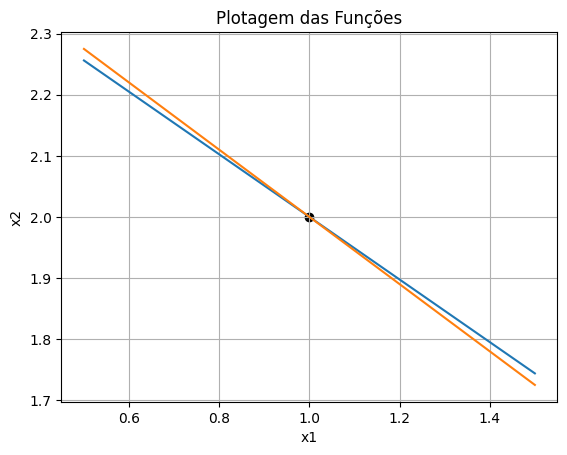

In [152]:
x = np.linspace(0.5, 1.5, 50)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plotagem das Funções')
plt.plot(x, f1(x), label='f1')
plt.plot(x, f2(x), label='f2')
plt.scatter(1,2, color='black')
plt.show()

Como ambas as equações do sistema podem ser representadas como retas num gráfico de duas dimensões (duas incógnitas), a solução é encontrada na intersecção das duas retas, ou seja, onde as incógnitas possuem o mesmo valor em ambas as equações.

##### Questão B

In [153]:
MANTISSA = 100

In [154]:
gaussian_X, gaussian_b = gauss_method(2, A.copy(), b.copy(), pivot=True)

In [155]:
gaussian_X, gaussian_b

(array([[1.1       , 2.        ],
        [0.        , 0.14090909]]),
 array([5.1       , 0.28181818]))

In [156]:
x = np.linalg.solve(gaussian_X, gaussian_b)
x

array([1., 2.])

##### Questão C

In [157]:
MANTISSA = 3

In [158]:
gaussian_X, gaussian_b = gauss_method(2, A.copy(), b.copy(), pivot=True)

In [159]:
gaussian_X, gaussian_b

(array([[ 1.1 ,  2.  ],
        [-0.  ,  0.14]]),
 array([5.1 , 0.28]))

In [160]:
x = np.round(np.linalg.solve(gaussian_X, gaussian_b), MANTISSA)
x

array([1., 2.])

Ao aplicarmos o método de eliminação de Gauss com e sem arredondamento, a única diferença notável é a matriz escalonada resultante. Sem arredondamento é visto que a matriz se encontra numa forma mais exata, entretanto, essa exatidão não é significativa a ponto de interferir no resultado final, o qual deu o mesmo que com arredondamento.

Isso se dá devido a simplicidade do sistema e, consequentemente, das operações necessárias para a eliminação de Gauss, e ao pivotamento parcial, evitando erros de arredondamento em cadeia.